# Mini Project 2 - ISYE-6644
Author: Oscar Cortez

In [8]:
from generators import randu, dessert_island, glibc
from rand_tests import (gof_test,
                        ks_test,
                        run_test_up_down,
                        run_test_above_below_mean,
                        correlation_test)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import seaborn as sns
sns.set_style("darkgrid")

In [9]:
sizes = [1, 10, 100, 1000, 10000]
seed = 12345

dist = {"numpy": np.random.random,
        "dessert_island": lambda x: dessert_island(seed, x),
        "glibc": lambda x: glibc(seed, x),
        "randu": lambda x: randu(seed, x)}

results = {"generator": [],
           "size": [],
           "time": []}

for s in sizes:
    for generator, rand in dist.items():
        results["generator"].append(generator)
        results["size"].append(s)
        start = time.perf_counter()
        values = rand(s)
        end = time.perf_counter()
        results["time"].append(end - start)

df_results = pd.DataFrame(results)

## Plot timing results

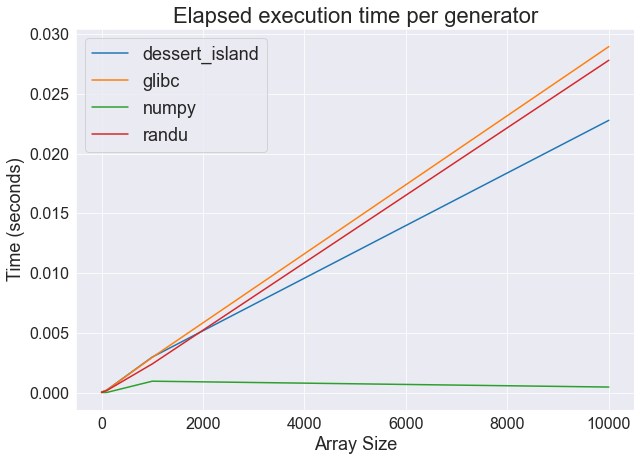

In [17]:
fig, ax = plt.subplots(1, figsize=(10, 7))
df_results.pivot("size", "generator", "time").plot(ax=ax)
plt.legend(fontsize=18)
plt.title("Elapsed execution time per generator", fontsize=22)
plt.ylabel("Time (seconds)", fontsize=18)
plt.xlabel("Array Size", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("time.svg")
plt.show()


## Plot in 3D

### Randu

In [4]:
%matplotlib notebook
randu_rands = randu(seed, 1000)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(randu_rands[:-2], randu_rands[1:-1], randu_rands[2:])

ax.set_xlabel('Ri')
ax.set_ylabel('Ri+1')
ax.set_zlabel('Ri+2')

plt.show()


<IPython.core.display.Javascript object>

### Dessert Island

In [5]:
randu_rands = dessert_island(seed, 1000)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(randu_rands[:-2], randu_rands[1:-1], randu_rands[2:])

ax.set_xlabel('Ri')
ax.set_ylabel('Ri+1')
ax.set_zlabel('Ri+2')

plt.show()

<IPython.core.display.Javascript object>

### glibc

In [6]:
randu_rands = glibc(seed, 1000)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(randu_rands[:-2], randu_rands[1:-1], randu_rands[2:])

ax.set_xlabel('Ri')
ax.set_ylabel('Ri+1')
ax.set_zlabel('Ri+2')

plt.show()

<IPython.core.display.Javascript object>

### Run PRN tests

In [12]:
seeds = [12345, 77807, 283092, 482344, 453604]
fixed_size = 10000

gen_2 = {"numpy": np.random.random,
          "dessert_island": dessert_island,
          "glibc": glibc,
          "randu": randu}

tests = {"Chi-Squared g-o-f": gof_test,
         "Kolmogorov-Smirnov Test": ks_test,
         "Run Test - Up and Down": run_test_up_down,
         "Run Test - Above and Below Mean": run_test_above_below_mean,
         "Correlation Test": correlation_test}

test_results = {"generator": [],
                "test": [],
                "passed": []}

for gen_name, gen in gen_2.items():
    for test_name, test in tests.items():
        test_success = 0
        for seed in seeds:
            if gen_name == "numpy":
                np.random.seed(seed)
                sample = gen(fixed_size)
            else:
                sample = gen(seed, fixed_size)
            success, _ = test(sample)
            test_success += success

        test_results["generator"].append(gen_name)
        test_results["test"].append(test_name)
        test_results["passed"].append(test_success)

df_test_results = pd.DataFrame(test_results).pivot("generator", "test", "passed")

In [13]:
df_test_results.to_csv("test_results.csv")
